<a href="https://colab.research.google.com/github/lszam/potentials-on/blob/main/PosDocON_Mag_Olsen2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Análise da Espessura da Litosfera Magnética no Google Colab
# Este notebook realiza:
# 1. Upload do arquivo .xyz com suscetibilidade magnética integrada.
# 2. Recorte da região da América do Sul, Atlântico Sul e Cráton de Angola.
# 3. Cálculo da espessura magnética assumindo χ = 0.04 SI.
# 4. Geração de mapas.
# 5. Exportação opcional dos dados recortados.

In [ ]:
# ## 1. Upload do arquivo `.xyz`
from google.colab import files
uploaded = files.upload()

Saving DepthIntegratedSusc.xyz to DepthIntegratedSusc.xyz


In [ ]:
# ## 2. Carregar os dados
import pandas as pd

In [ ]:
arquivo = list(uploaded.keys())[0]  # get the 1st uploaded file
df = pd.read_csv(arquivo, delim_whitespace=True,
                 header=None, names=["lon", "lat", "lithospheric_susc"])
df.head()

<ipython-input-4-3598888412>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(arquivo, delim_whitespace=True,


,lon,lat,lithospheric_susc
0,-180.00,90.0,0.313674
1,-179.75,90.0,0.313674
2,-179.50,90.0,0.313674
3,-179.25,90.0,0.313674
4,-179.00,90.0,0.313674


In [ ]:
# ## 3. Recorte da área de interesse (América do Sul, Atlântico Sul e Cráton de Angola)
lat_min, lat_max = -60, 15
lon_min, lon_max = -85, 25

In [ ]:
df_recorte = df[(df["lat"] >= lat_min) & (df["lat"] <= lat_max) &
                (df["lon"] >= lon_min) & (df["lon"] <= lon_max)]

In [ ]:
# ## 4. Mapa da Suscetibilidade Integrada
import matplotlib.pyplot as plt

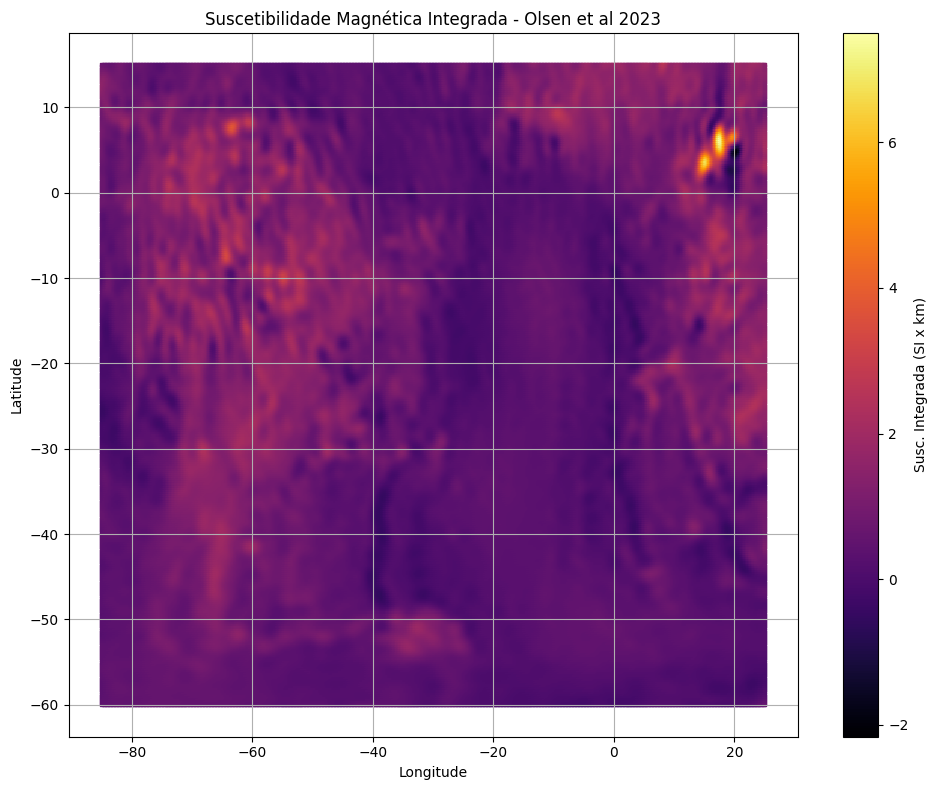

In [ ]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(df_recorte["lon"], df_recorte["lat"], c=df_recorte["lithospheric_susc"],
                 cmap="inferno", s=5, marker='s')
plt.colorbar(sc, label="Susc. Integrada (SI x km)")
plt.title("Suscetibilidade Magnética Integrada - Olsen et al 2023")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ## 5. Cálculo da Espessura Magnética
df_recorte = df_recorte.copy() # a copy to avoid SettingWithCopyWarning
df_recorte["h_mag_km"] = df_recorte["lithospheric_susc"] / 0.04
df_recorte = df_recorte[df_recorte["h_mag_km"] >= 0]

plt.figure(figsize=(10, 8))
sc = plt.scatter(df_recorte["lon"], df_recorte["lat"], c=df_recorte["h_mag_km"],
                 cmap="inferno", s=5, marker='s')
plt.colorbar(sc, label="Espessura Magnética (km)")
plt.title("Espessura da Litosfera Magnética (para χ = 0.04 SI)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_recorte.head()

,lon,lat,lithospheric_susc,h_mag_km
432680,-85.00,15.0,0.730774,18.269357
432681,-84.75,15.0,0.700987,17.524680
432682,-84.50,15.0,0.659841,16.496015
432683,-84.25,15.0,0.616135,15.403382
432684,-84.00,15.0,0.578025,14.450623


In [ ]:
# Save files as csv
df_recorte.to_csv("recorte_mag_olsen2023.csv", index=False)
files.download("recorte_mag_olsen2023.csv")